# Recurrent Neural Network

This tutorial correspond to the section 15 (building a RNN) of **DEEP LEARNING A-Z** from https://www.udemy.com/deeplearning

## Part 1 - Data Preprocessing

### Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

### Importing the training set

In [24]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


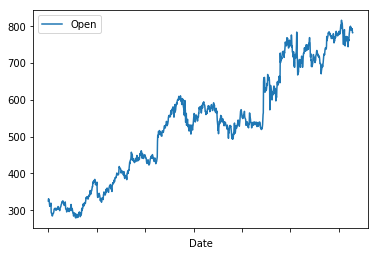

In [25]:
dataset_train.plot(x='Date', y='Open')


### Feature Scaling

Is important to do normalization. Specially when a sigmoid function is used.

Normalization: $x_{new} = \frac{x - x_{min}}{x_{max}-x_{min}}$

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [27]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

Add another dimension.

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

### Importing the Keras libraries and packages

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [30]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

To avoid overfitting is a good practice to add a 20% dropout.

In [31]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [33]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [34]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [35]:
regressor.add(Dense(units = 1))

### Compiling the RNN

Check optimizers list in https://keras.io/optimizers/

Loss function: In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.
$$ MSE = \displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2$$  

In [36]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [37]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0533
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0039
Epoch 9/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 10s 

1198/1198 [==============================] - 11s 9ms/step - loss: 0.0013
Epoch 97/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
